# Supplemental Material for Lag Manuscript

Lagged Predictions of Next Week Alcohol Use for Precision Mental Health Support

Kendra Wyant, Gaylen E. Fronk, Jiachen Yu, and John J. Curtin  
January 3, 2025

This file contains the supplemental materials for *Lagged Predictions of Next Week Alcohol Use for Precision Mental Health Support*. It includes a transparency report and all supplemental figures and tables. Additional materials are made available on our study’s OSF page (<https://osf.io/xta67/>).

------------------------------------------------------------------------

In [ ]:
#| echo: false

suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(source("https://github.com/jjcurtin/lab_support/blob/main/format_path.R?raw=true"))
suppressPackageStartupMessages(library(tidyposterior))
suppressPackageStartupMessages(library(kableExtra))
library(patchwork)


theme_set(theme_classic())

options(knitr.kable.NA = '')

path_models_lag <- format_path(str_c("studydata/risk/models/lag"))
path_processed <- format_path(str_c("studydata/risk/data_processed/lag"))

In [ ]:
#| echo: false

pp_tidy <- read_csv(here::here(path_models_lag, "pp_tidy.csv"), 
                                 show_col_types = FALSE) 

ci <- read_csv(here::here(path_models_lag, "test_metrics_all_pp_perf.csv"), 
                                 show_col_types = FALSE) |> 
  mutate(model = factor(model, levels = c("0 lag", "24 lag", "72 lag", "168 lag", "336 lag"),
                        labels = c("0 hours", "24 hours", "72 hours", "168 hours", "336 hours")))

pp_dem <- read_csv(here::here(path_models_lag, "pp_dem_all.csv"), 
                                 show_col_types = FALSE)

pp_dem_contrast <- read_csv(here::here(path_models_lag, "pp_dem_contrast_all.csv"), 
                                 show_col_types = FALSE)

### Figure S1: Full Posterior Distributions for auROC by Model

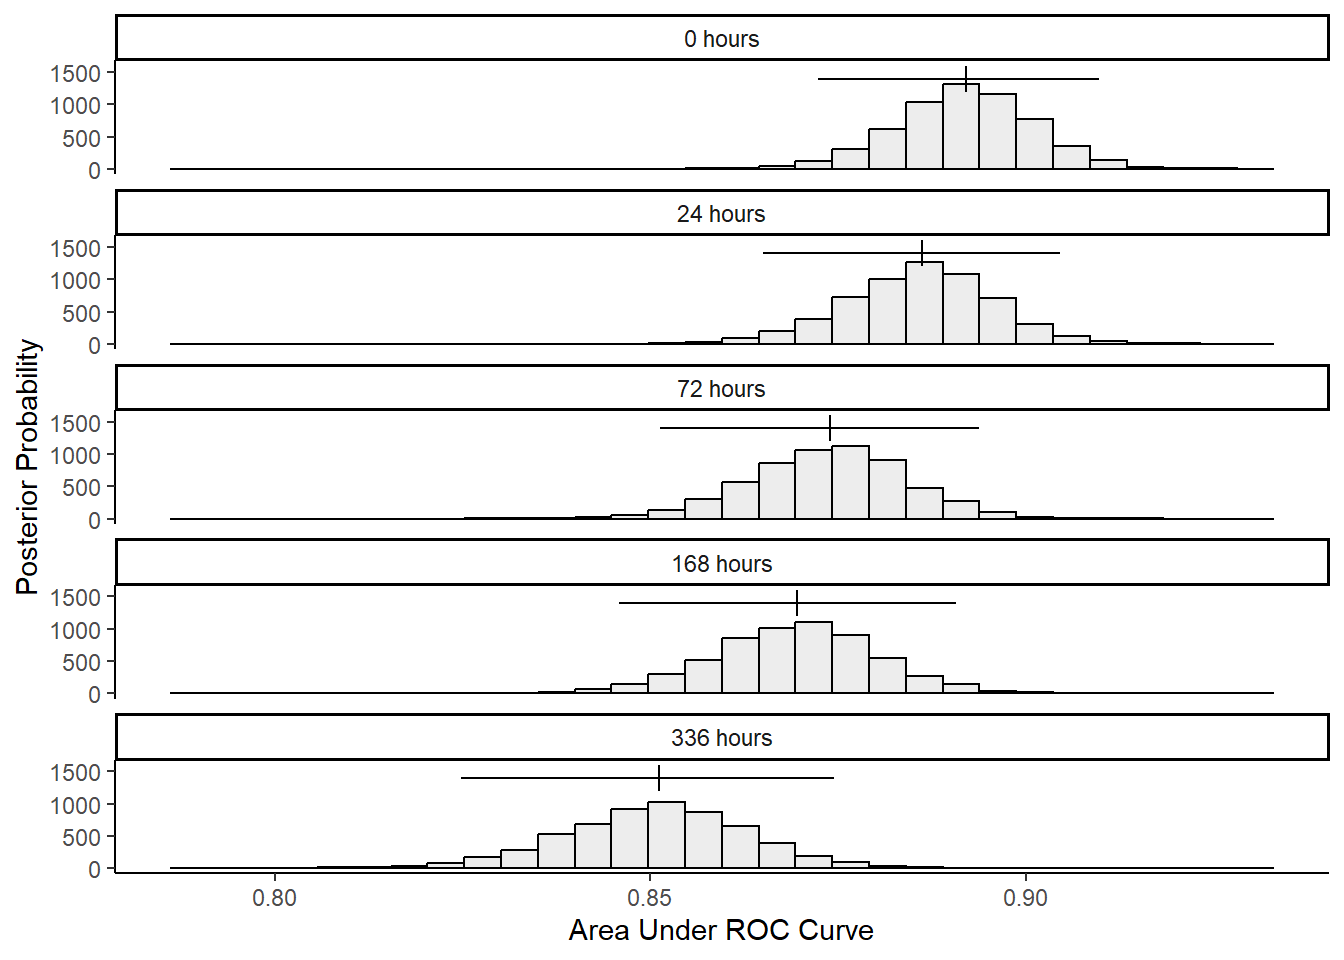

In [ ]:
#| label: fig-lag-posteriors
#| fig-cap:
#|   - "The plots above depict the posterior probabilities for the areas under the receiver operating characteristic curves (auROCs) by model lag. Each row represents a model lag (0, 24, 72, 168, and 336 hours)). The solid vertical lines represent the median posterior probability. The horizontal lines represent the 95% CI."

pp_tidy |> 
  mutate(model = factor(model, levels = c("lag0", "lag24", "lag72", "lag168", "lag336"),
                        labels = c("0 hours", "24 hours", "72 hours", "168 hours", "336 hours"))) |>
  ggplot() + 
  geom_histogram(aes(x = posterior), fill = "light grey", color = "black", alpha = .4, 
                 bins = 30) +
  geom_segment(mapping = aes(y = 1200, yend = 1600, x = pp_median, xend = pp_median),
               data = ci) +
  geom_segment(mapping = aes(y = 1400, yend = 1400, x = pp_lower, xend = pp_upper),
                data = ci) +
  facet_wrap(~model, ncol = 1) +
  scale_y_continuous("Posterior Probability", breaks = c(0, 500, 1000, 1500)) +
  xlab("Area Under ROC Curve") +
  theme_classic() +
  theme(legend.position = "none")

### Table S1: Model performance by Demographic Group

In [ ]:
pp_sex <- pp_dem_contrast |> 
  filter(contrast == "female vs male") |> 
   mutate(ci = str_c("[", round(lower, 3), ", ", round(upper, 3), "]"),
         median = as.character(round(median, 3)),
         probability = as.character(round(probability, 3))) |> 
  select(lag, median, ci, probability) |> 
  rename(`Lag (hours)`= lag,
         Median = median,
         `Bayesian CI` = ci,
         Probability = probability)

pp_income <- pp_dem_contrast |> 
  filter(contrast == "below poverty vs above poverty") |> 
   mutate(ci = str_c("[", round(lower, 3), ", ", round(upper, 3), "]"),
         median = as.character(round(median, 3)),
         probability = as.character(round(probability, 3))) |> 
  select(lag, median, ci, probability) |> 
  rename(`Lag (hours)`= lag,
         `Median ` = median,
         `Bayesian CI ` = ci,
         `Probability ` = probability)

pp_race <- pp_dem_contrast |> 
  filter(contrast == "not white vs non-hispanic white") |> 
   mutate(ci = str_c("[", round(lower, 3), ", ", round(upper, 3), "]"),
         median = as.character(round(median, 3)),
         probability = as.character(round(probability, 3))) |> 
  select(lag, median, ci, probability) |> 
  rename(`Lag (hours)`= lag,
         `Median  ` = median,
         `Bayesian CI  ` = ci,
         `Probability   ` = probability)

In [ ]:
#| label: tbl-fairness
#| tbl-cap: "Model Performance by Demographic Group"

pp_sex |> 
  full_join(pp_income, by = "Lag (hours)") |> 
  full_join(pp_race, by = "Lag (hours)") |> 
  kbl() |> 
  add_header_above(c(" " = 1, "Race" = 3, "Sex" = 3, "Income" = 3))